# Question 2

## Show some of samples

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


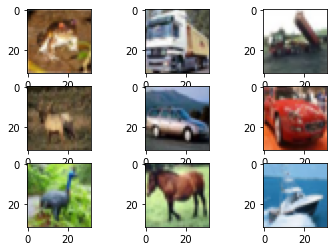

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(trainX[i])
# show the figure
plt.show()

## 1

In [ ]:
# in report

## 2

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_33 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_34 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_35 (Batc (None, 16, 16, 64)       

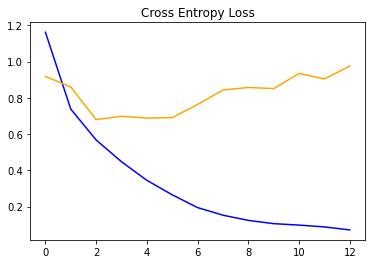

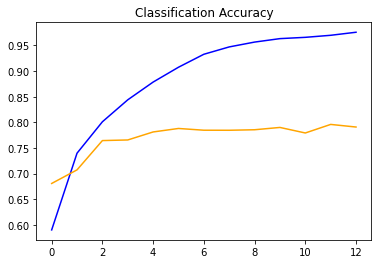

In [ ]:
# baseline model with increasing dropout on the cifar10 dataset
import sys
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
import random as rn
import tensorflow as tf
import numpy as np

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',  padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    # compile model
    # opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.show()
    # plot accuracy
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.show()

# run the test harness for evaluating a model
def run():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    callbacks = [EarlyStopping(monitor='val_loss', patience=10)]
    model.summary()
    history = model.fit(trainX, trainY, epochs=500, batch_size=64, validation_data=(testX, testY), verbose=2, callbacks=callbacks)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=2)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
run()

## 3

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 10)                30730     
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
782/782 - 2s - loss: 1.9449 - accuracy: 0.3166 - val_loss: 1.8943 - val_accuracy: 0.3239
Epoch 2/500
782/782 - 2s - loss: 1.8422 - accuracy: 0.3568 - val_loss: 1.8145 - val_accuracy: 0.3640
Epoch 3/500
782/782 - 2s - loss: 1.8138 - accuracy: 0.3700 - val_loss: 1.8581 - val_accuracy: 0.3599
Epoch 4/500
782/782 - 2s - loss: 1.8129 - accuracy: 0.3707 - val_loss: 1.8900 - val_accuracy: 0.3572
Epoch 5/500
782/782 - 2s - loss: 1.7974 - accuracy: 0.3784 - val_loss: 1.8490 - val_accuracy: 0.3657
Epoch 6/500
782/782 - 2s - loss: 1.7821 - accuracy: 0.3847 - val_loss: 1.8057 - val_accuracy: 0.3784
Epoch 7/500
782/782 - 2s - loss: 1.783

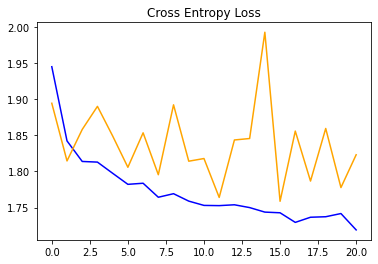

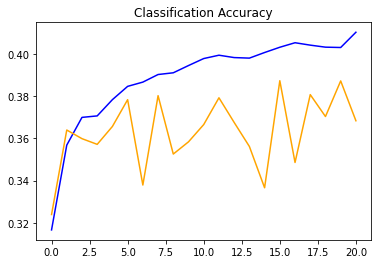

In [ ]:
# baseline model with increasing dropout on the cifar10 dataset
import sys
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
import random as rn
import tensorflow as tf
import numpy as np

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_model():
    model = Sequential()
    model.add(Dense(10, activation='softmax', input_shape=(3072, )))
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.show()
    # plot accuracy
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.show()

# run the test harness for evaluating a model
def run():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    callbacks = [EarlyStopping(monitor='val_loss', patience=5)]
    model.summary()
    trainX = np.reshape(trainX, (50000, 3072))
    testX = np.reshape(testX, (10000, 3072))
    history = model.fit(trainX, trainY, epochs=500, batch_size=64, validation_data=(testX, testY), verbose=2, callbacks=callbacks)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=2)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test
run()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 100)               307300    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1010      
Total params: 308,310
Trainable params: 308,310
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
782/782 - 2s - loss: 1.9123 - accuracy: 0.3142 - val_loss: 1.7994 - val_accuracy: 0.3546
Epoch 2/500
782/782 - 2s - loss: 1.7534 - accuracy: 0.3770 - val_loss: 1.6848 - val_accuracy: 0.4020
Epoch 3/500
782/782 - 2s - loss: 1.7043 - accuracy: 0.3932 - val_loss: 1.6493 - val_accuracy: 0.4137
Epoch 4/500
782/782 - 2s - loss: 1.6611 - accuracy: 0.4101 - val_loss: 1.6822 - val_accuracy: 0.3933
Epoch 5/500
782/782 - 2s - loss: 1.6305 - accuracy: 0.4180 - val_loss: 1.6224 - val_accuracy: 0.4276
Epoch

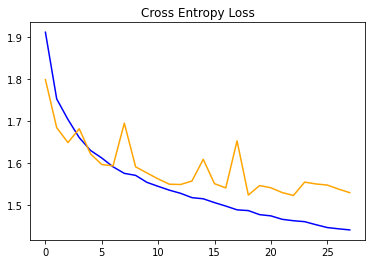

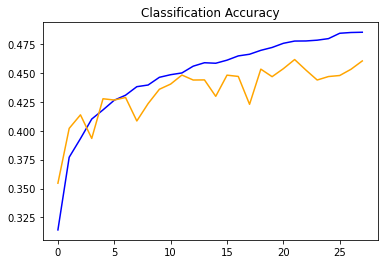

In [ ]:
# baseline model with increasing dropout on the cifar10 dataset
import sys
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
import random as rn
import tensorflow as tf
import numpy as np

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_model():
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=(3072, )))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.show()
    # plot accuracy
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.show()

# run the test harness for evaluating a model
def run():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    callbacks = [EarlyStopping(monitor='val_loss', patience=5)]
    model.summary()
    trainX = np.reshape(trainX, (50000, 3072))
    testX = np.reshape(testX, (10000, 3072))
    history = model.fit(trainX, trainY, epochs=500, batch_size=64, validation_data=(testX, testY), verbose=2, callbacks=callbacks)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=2)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
run()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 100)               307300    
_________________________________________________________________
dense_20 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_21 (Dense)             (None, 10)                510       
Total params: 312,860
Trainable params: 312,860
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
782/782 - 2s - loss: 1.8996 - accuracy: 0.3119 - val_loss: 1.7668 - val_accuracy: 0.3598
Epoch 2/500
782/782 - 2s - loss: 1.7139 - accuracy: 0.3844 - val_loss: 1.6692 - val_accuracy: 0.3974
Epoch 3/500
782/782 - 2s - loss: 1.6545 - accuracy: 0.4067 - val_loss: 1.6210 - val_accuracy: 0.4139
Epoch 4/500
782/782 - 2s - loss: 1.6087 - accuracy: 0.4233 - val_loss: 1.6

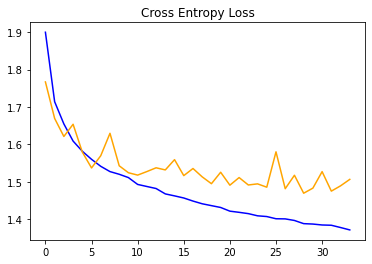

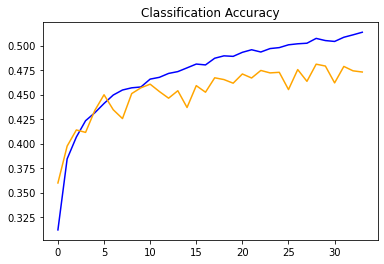

In [ ]:
# baseline model with increasing dropout on the cifar10 dataset
import sys
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
import random as rn
import tensorflow as tf
import numpy as np

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_model():
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=(3072, )))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.show()
    # plot accuracy
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.show()

# run the test harness for evaluating a model
def run():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    callbacks = [EarlyStopping(monitor='val_loss', patience=5)]
    model.summary()
    trainX = np.reshape(trainX, (50000, 3072))
    testX = np.reshape(testX, (10000, 3072))
    history = model.fit(trainX, trainY, epochs=500, batch_size=64, validation_data=(testX, testY), verbose=2, callbacks=callbacks)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=2)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
run()

## 4

Epoch 1/10
782/782 [==============================] - 9s 10ms/step - loss: 1.4411 - accuracy: 0.5003 - val_loss: 0.9569 - val_accuracy: 0.6733
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 0.7548 - accuracy: 0.7393 - val_loss: 0.8038 - val_accuracy: 0.7241
Epoch 3/10
782/782 [==============================] - 7s 9ms/step - loss: 0.5645 - accuracy: 0.8039 - val_loss: 0.7075 - val_accuracy: 0.7591
Epoch 4/10
782/782 [==============================] - 7s 9ms/step - loss: 0.4251 - accuracy: 0.8540 - val_loss: 0.6890 - val_accuracy: 0.7697
Epoch 5/10
782/782 [==============================] - 7s 9ms/step - loss: 0.3144 - accuracy: 0.8941 - val_loss: 0.6877 - val_accuracy: 0.7790
Epoch 6/10
782/782 [==============================] - 7s 9ms/step - loss: 0.2380 - accuracy: 0.9191 - val_loss: 0.6754 - val_accuracy: 0.7910
Epoch 7/10
782/782 [==============================] - 7s 9ms/step - loss: 0.1633 - accuracy: 0.9456 - val_loss: 0.7525 - val_accuracy: 0.7842
Epoch

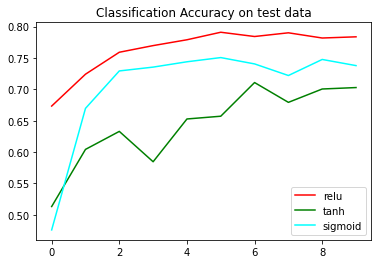

In [ ]:
# baseline model with increasing dropout on the cifar10 dataset
import sys
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
import random as rn
import tensorflow as tf
import numpy as np

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_model(act_func):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation=act_func, kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation=act_func, kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation=act_func, kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation=act_func, kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation=act_func, kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation=act_func, kernel_initializer='he_uniform',  padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation=act_func, kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    # compile model
    # opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# run the test harness for evaluating a model
def run():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)

    #relu
    # define model
    model = define_model("relu")
    # fit model
    history_relu = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY))

    #tanh
    # define model
    model = define_model("tanh")
    # fit model
    history_tanh = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY))

    #sigmoid
    # define model
    model = define_model("sigmoid")
    # fit model
    history_sigmoid = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY))
    # graph
    # plot accuracy
    plt.title('Classification Accuracy on test data')
    plt.plot(history_relu.history['val_accuracy'], color='red', label='relu')
    plt.plot(history_tanh.history['val_accuracy'], color='green', label='tanh')
    plt.plot(history_sigmoid.history['val_accuracy'], color='cyan', label='sigmoid')
    plt.legend()
    plt.show()

# entry point, run the test harness
run()

## 5

170500096/170498071 [==============================] - 2s 0us/step
Epoch 1/10
782/782 [==============================] - 42s 11ms/step - loss: 1.4469 - accuracy: 0.4967 - val_loss: 0.9551 - val_accuracy: 0.6731
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 0.7593 - accuracy: 0.7354 - val_loss: 0.8029 - val_accuracy: 0.7204
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 0.5674 - accuracy: 0.8021 - val_loss: 0.7869 - val_accuracy: 0.7323
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 0.4279 - accuracy: 0.8534 - val_loss: 0.6864 - val_accuracy: 0.7751
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3161 - accuracy: 0.8918 - val_loss: 0.6615 - val_accuracy: 0.7921
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2344 - accuracy: 0.9202 - val_loss: 0.7162 - val_accuracy: 0.7791
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss:

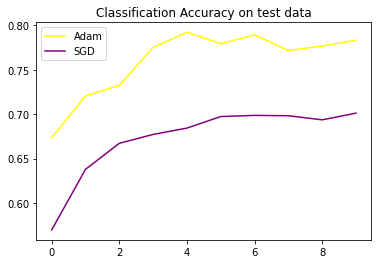

In [ ]:
# baseline model with increasing dropout on the cifar10 dataset
import sys
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
import random as rn
import tensorflow as tf
import numpy as np

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_model(optimizer):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',  padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    # compile model
    if optimizer == "adam" or optimizer == "Adam":
        model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
    elif optimizer == "sgd" or optimizer == "Sgd" or optimizer == "SGD":
        opt = SGD(lr=0.001, momentum=0.9)
        model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# run the test harness for evaluating a model
def run():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)

    #Adam
    # define model
    model = define_model("adam")
    # fit model
    history_adam = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY))

    #SGD
    # define model
    model = define_model("sgd")
    # fit model
    history_sgd = model.fit(trainX, trainY, epochs=10, batch_size=64, validation_data=(testX, testY))
    # graph
    # plot accuracy
    plt.title('Classification Accuracy on test data')
    plt.plot(history_adam.history['val_accuracy'], color='yellow', label='Adam')
    plt.plot(history_sgd.history['val_accuracy'], color='purple', label='SGD')
    plt.legend()
    plt.show()

# entry point, run the test harness
run()

## 6

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_23 (Batc (None, 16, 16, 64)       

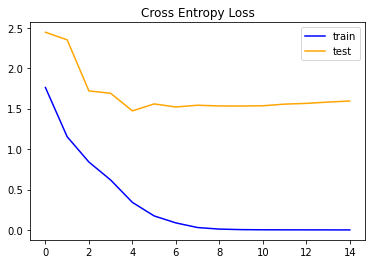

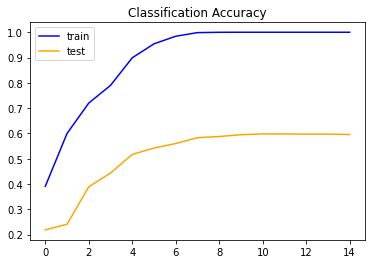

In [ ]:
# baseline model with increasing dropout on the cifar10 dataset
import sys
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping, ModelCheckpoint
import random as rn
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    trainX_t1 = trainX[np.where(trainY==0), :][0, :600, :, :, :]
    for i in range(1, 10):
        trainX_t2 = trainX[np.where(trainY==i), :][0, :600, :, :, :]
        trainX_t1 = np.vstack((trainX_t1, trainX_t2))
    trainX = trainX_t1
    trainY = np.array([i for i in range(10) for j in range(600)])
    idx = np.random.permutation(6000)
    trainX = trainX[idx]
    trainY = trainY[idx]
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',  padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    # compile model
    # opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.legend()
    plt.show()
    # plot accuracy
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.legend()
    plt.show()

# run the test harness for evaluating a model
def run():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    callbacks = [EarlyStopping(monitor='val_loss', patience=10)]
    model.summary()
    history = model.fit(trainX, trainY, epochs=500, batch_size=64, validation_data=(testX, testY), verbose=2, callbacks=callbacks)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=2)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
run()

## 7

### One conv2d with 7x7 kernel size in each CNN layer 

170500096/170498071 [==============================] - 11s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        4736      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        100416    
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
______________________________________________________

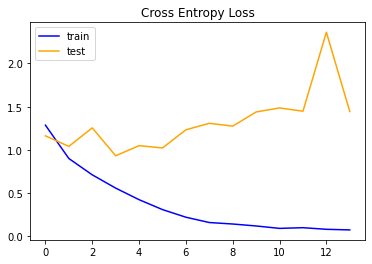

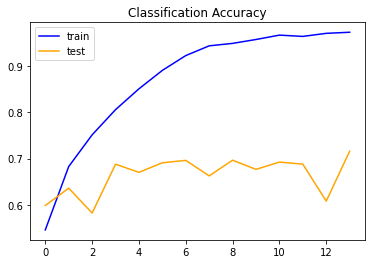

In [ ]:
# baseline model with increasing dropout on the cifar10 dataset
import sys
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
import random as rn
import tensorflow as tf
import numpy as np

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (7, 7), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (7, 7), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (7, 7), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    # compile model
    # opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.legend()
    plt.show()
    # plot accuracy
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.legend()
    plt.show()

# run the test harness for evaluating a model
def run():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    callbacks = [EarlyStopping(monitor='val_loss', patience=10)]
    model.summary()
    history = model.fit(trainX, trainY, epochs=500, batch_size=64, validation_data=(testX, testY), verbose=2, callbacks=callbacks)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=2)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
run()

### One conv2d with 3x3 kernel size in each CNN layer 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)        

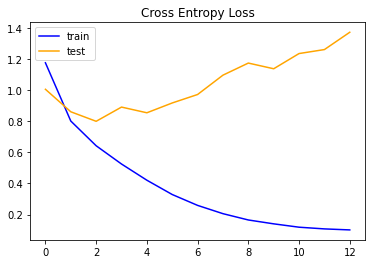

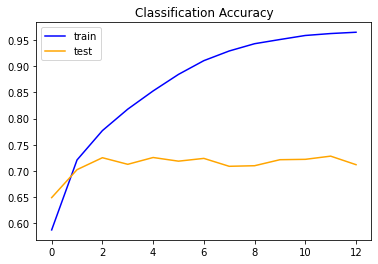

In [ ]:
# baseline model with increasing dropout on the cifar10 dataset
import sys
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
import random as rn
import tensorflow as tf
import numpy as np

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    # compile model
    # opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.legend()
    plt.show()
    # plot accuracy
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.legend()
    plt.show()

# run the test harness for evaluating a model
def run():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    callbacks = [EarlyStopping(monitor='val_loss', patience=10)]
    model.summary()
    history = model.fit(trainX, trainY, epochs=500, batch_size=64, validation_data=(testX, testY), verbose=2, callbacks=callbacks)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=2)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
run()

### Two conv2d with 3x3 kernel size in each CNN layer 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 16, 16, 64)       

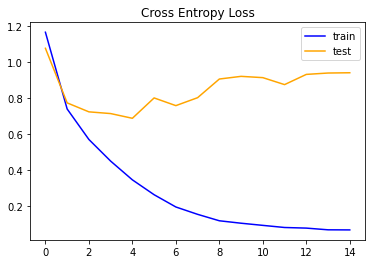

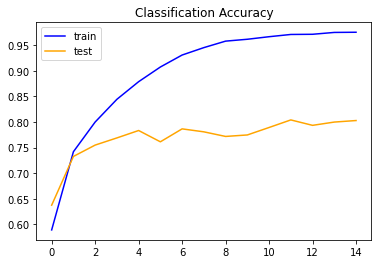

In [ ]:
# baseline model with increasing dropout on the cifar10 dataset
import sys
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
import random as rn
import tensorflow as tf
import numpy as np

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',  padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dense(10, activation='softmax'))
    # compile model
    # opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.legend()
    plt.show()
    # plot accuracy
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.legend()
    plt.show()

# run the test harness for evaluating a model
def run():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    callbacks = [EarlyStopping(monitor='val_loss', patience=10)]
    model.summary()
    history = model.fit(trainX, trainY, epochs=500, batch_size=64, validation_data=(testX, testY), verbose=2, callbacks=callbacks)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=2)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
run()

## 8

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_28 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_29 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)       

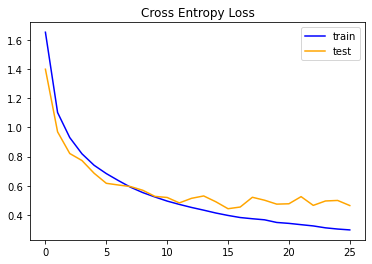

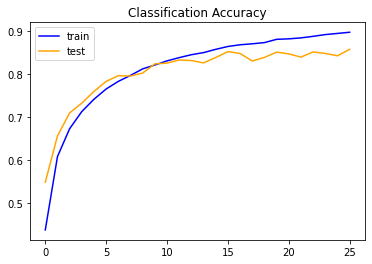

In [5]:
# baseline model with increasing dropout on the cifar10 dataset
import sys
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
import random as rn
import tensorflow as tf
import numpy as np

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',  padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    # compile model
    # opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.legend()
    plt.show()
    # plot accuracy
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.legend()
    plt.show()

# run the test harness for evaluating a model
def run():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    callbacks = [EarlyStopping(monitor='val_loss', patience=10)]
    model.summary()
    history = model.fit(trainX, trainY, epochs=500, batch_size=64, validation_data=(testX, testY), verbose=2, callbacks=callbacks)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=2)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
run()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_35 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_36 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 64)       

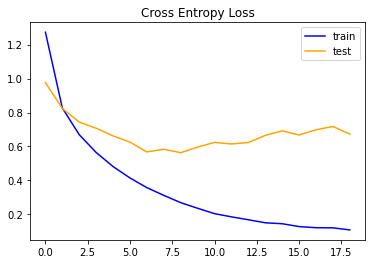

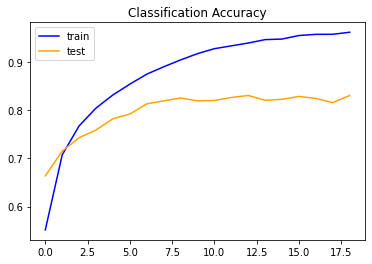

In [6]:
# baseline model with increasing dropout on the cifar10 dataset
import sys
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
import random as rn
import tensorflow as tf
import numpy as np

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',  padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.1))
    model.add(Dense(10, activation='softmax'))
    # compile model
    # opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.legend()
    plt.show()
    # plot accuracy
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.legend()
    plt.show()

# run the test harness for evaluating a model
def run():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    callbacks = [EarlyStopping(monitor='val_loss', patience=10)]
    model.summary()
    history = model.fit(trainX, trainY, epochs=500, batch_size=64, validation_data=(testX, testY), verbose=2, callbacks=callbacks)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=2)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
run()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_42 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_43 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 16, 16, 64)       

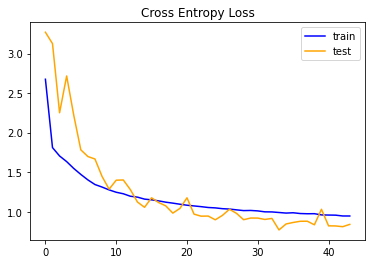

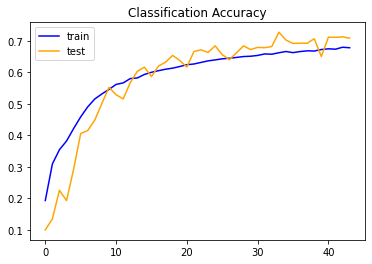

In [7]:
# baseline model with increasing dropout on the cifar10 dataset
import sys
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
import random as rn
import tensorflow as tf
import numpy as np

rn.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.8))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.8))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',  padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.8))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Dropout(0.8))
    model.add(Dense(10, activation='softmax'))
    # compile model
    # opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.legend()
    plt.show()
    # plot accuracy
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.legend()
    plt.show()

# run the test harness for evaluating a model
def run():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    callbacks = [EarlyStopping(monitor='val_loss', patience=10)]
    model.summary()
    history = model.fit(trainX, trainY, epochs=500, batch_size=64, validation_data=(testX, testY), verbose=2, callbacks=callbacks)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=2)
    print('> %.3f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)

# entry point, run the test harness
run()